This is the collection of codes that explore the food atlas datasets and CDC datasets

The codes are written to explore the datasets and test the following hypothesis:

i.	Is there a pattern of how the food choice, physical activity and diabetes and obesity prevalence differ by states or counties?

ii.	Is there a noticeable variation in the food choice, health condition by states or by counties within each state?

iii. Does low access to grocery and supercenter correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

iv.	Does the type of local stores correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

v.	Do type of restaurants correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

vi. Do food choice overall (defined as the combination of overall access to grocery store, type of local stores, and type of restaurants) correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

vii.	Do level of physical activity correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

viii. Do change in physical activity or food environment correlate with change in prevalence of diabetes and obesity? How is the correlation for the overall population? Or in different states or areas of US?

ix. Are there counties with both high level of physical activity and rich food choice but high prevalence of diabetes or obesity? Similarly, are there counties with low level of physical activity and poor food choice but relatively low prevalence of diabetes and obestiy (clustering analysis?) If there are, whether additional data can explain the unusual observation? 

x. Are there counties with small change in level of physical activity and food choice but great change in prevalence of diabetes or obesity? Or vice versa? If there are, whether additional data can explain the unusual observation? 

This document is broken into five sections: 

I. Importing packages and Defining functions for analysis
II. Testing hypothesis i & ii
III. Testing hypothesis iii-vi
IV. Testing hypothesis vii
V. Testing hypothesis ix and x


Section I. Importing packages, Defining functions for analysis and import datasets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
##define functions

#Define function Boxplot_by_state() to draw boxplot by a groups: State, Areas with differnet composition of age group, socioeconomics, or their combinations

##### df: dataframe to read in, col:the col category by which the data is grouped, vert: direction of boxplot, 0 for horizontal and 1 for vertical
def Boxplot_by_state(df, col, by, vert):
    by_values=list(set(df[by]))
    by_values.sort()
    plt.figure(figsize=(18, 16))   
    boxes=list()
    for v in by_values:
        df_one_type=df[df[by]==v]
        boxes.append(list(df_one_type[col]))
    plt.boxplot(boxes,vert=vert)
    plt.yticks(range(1,len(by_values)+1), by_values)
    

            
#construct variable info dictionary for analysis
from collections import defaultdict

url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Food_atlas/variable_info.csv'
var_info_df=pd.read_csv(url,encoding="ISO-8859-1")
var_info_dict=dict()

for idx in var_info_df.index:
    
    k1=var_info_df['Category Name'][idx]
    k2=var_info_df['Category Code'][idx]
    k3=var_info_df['Sub_subcategory Name'][idx]
    k4=var_info_df['Units'][idx]
    var=var_info_df['Variable Code'][idx]
    
    if k3==np.nan:
        k3='Overall'
    var_info_dict[var]=[k1,k2,k3,k4]   
    

#create a subset of dataframe by category
def Df_subset(df, category,var_info_dict):
    vars_to_drop=[]
    for c in df_food.columns:
        if c not in ['State','County']:
            if var_info_dict[c][1] !=category:
                vars_to_drop.append(c)

    df_sub=df.drop(vars_to_drop, axis=1)
    return df_sub

#a function that transform 
def Df_subgroups(df, cutoffs,col):
    df_list=list()
    for i in range(1,len(cutoffs)):
        df_list.append(df[(df[col]<cutoffs[i])&(df[col]>=cutoffs[i-1])])
    return df_list       

Read food atlas dataset and CDC datasets and merge these two datasets

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

food_atlas_url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Food_atlas/df_tp_1.csv'
cdc_url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/CDC/Combined.csv'

df_food=pd.read_csv(food_atlas_url,index_col='FIPS',encoding="ISO-8859-1")
df_cdc=pd.read_csv(cdc_url,index_col='FIPS',encoding="ISO-8859-1")

II. Testing hypothesis:
    i.	Is there a pattern of how the food choice, physical activity and diabetes and obesity prevalence differ by states or counties?

    ii.	Is there a noticeable variation in the food choice, health condition by states or by counties within each state?

In [6]:
df_food.columns

Index(['State', 'County', 'Low_Access_Overall', 'Low_Access_Low_income',
       'Low_Access_Children', 'Low_Access_Senior', 'Grocery', 'Supercenter',
       'Convenience', 'Specialized', 'SNAP_store', 'WIC_store', 'Fast_food',
       'Full_service', 'Assistance', 'Low_insecurity', 'Very_low_insecurity',
       'Adult_db', 'Adult_ob', 'Recreation_facility', 'White', 'Black',
       'Hispanic', 'Asian', 'American Indian or Alaska Native',
       'Hawaiian or Pacific Islander', '>=65', '<18', 'Poverty_rate'],
      dtype='object')

In [7]:
df_food['Adult']=100-df_food['>=65']-df_food['<18']
df_food['Low_Access_Adult']=df_food['Low_Access_Overall']-df_food['Low_Access_Children']
df_food['Percentage_fast_food']=df_food['Fast_food']/(df_food['Fast_food']+df_food['Full_service'])
df_food['grocery_super']=df_food['Grocery']+df_food['Supercenter']
df_food['percentage_grocery_super']=(df_food['Grocery']+df_food['Supercenter'])/(df_food['Grocery']+df_food['Supercenter']
                                                                              +df_food['Convenience']+df_food['Specialized'])
df_food['assist_store']=df_food['SNAP_store']+df_food['WIC_store']  

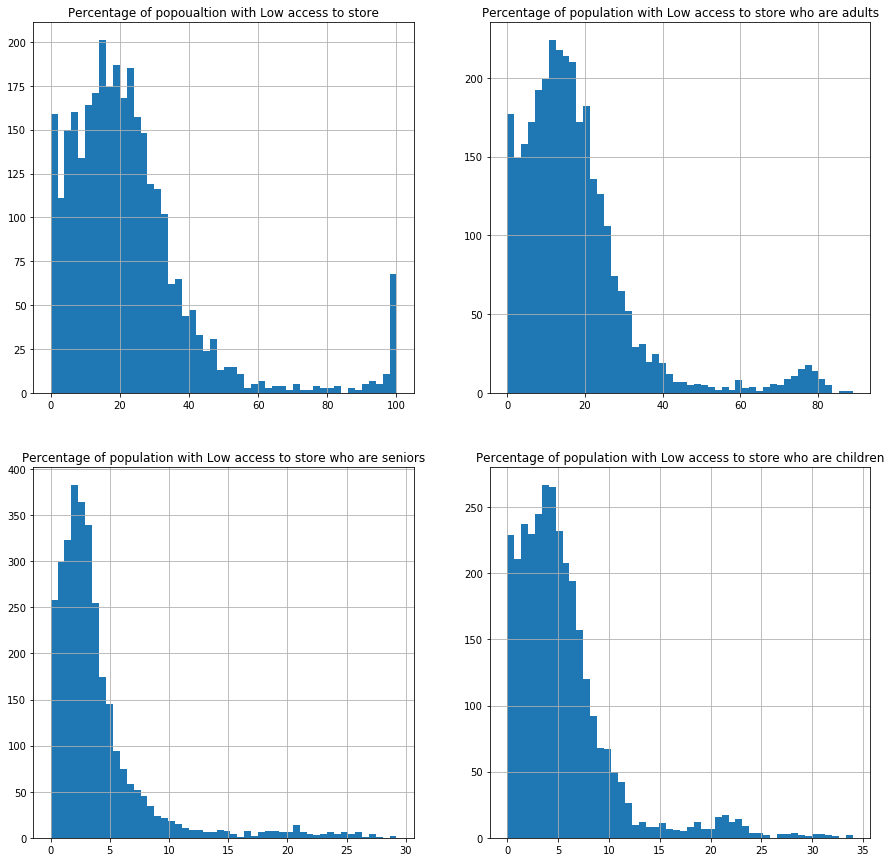

In [8]:
plt.figure(figsize=(15, 15)) 

plt.subplot(2,2,1)
plt.title('Percentage of popoualtion with Low access to store')
df_food['Low_Access_Overall'].hist(bins=50)
plt.legend()


plt.subplot(2,2,2)
plt.title('Percentage of population with Low access to store who are adults')
df_food['Low_Access_Adult'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(2,2,3)
plt.title('Percentage of population with Low access to store who are seniors')
df_food['Low_Access_Senior'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(2,2,4)
plt.title('Percentage of population with Low access to store who are children')
df_food['Low_Access_Children'].hist(bins=50)
plt.legend()
plt.show()

C:\anaconda\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


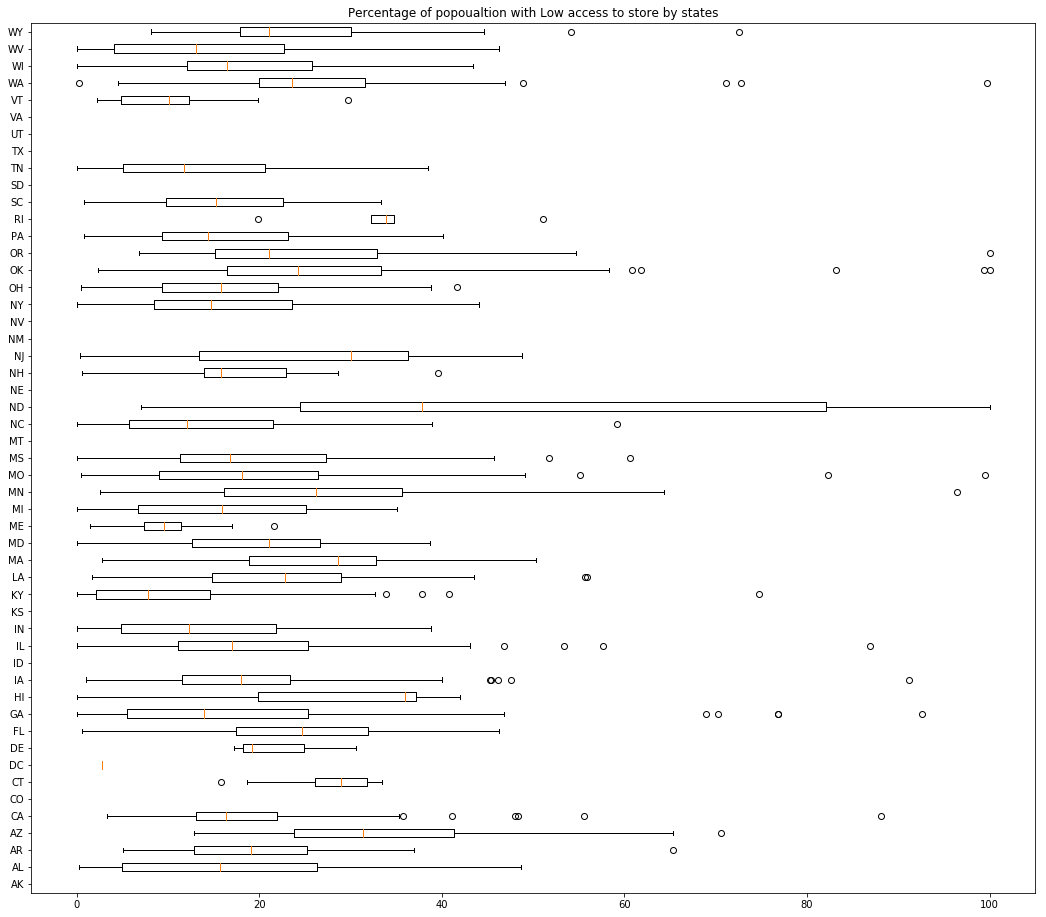

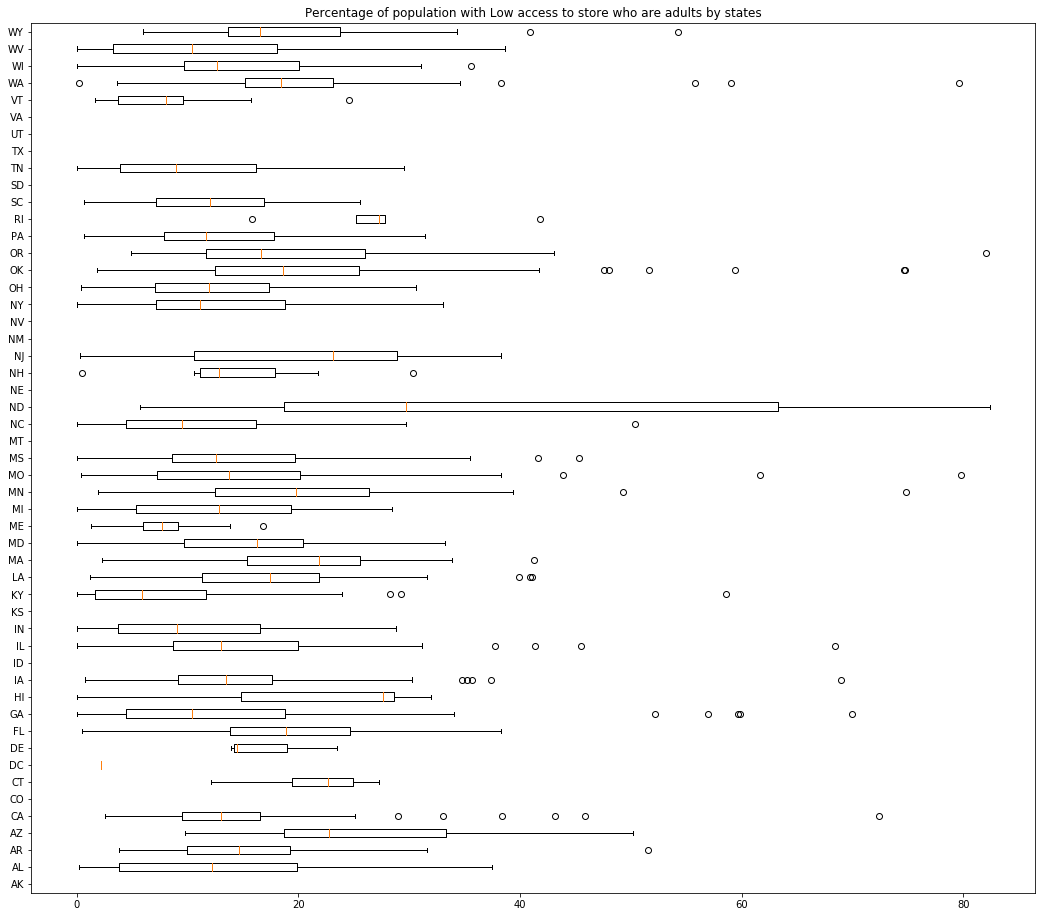

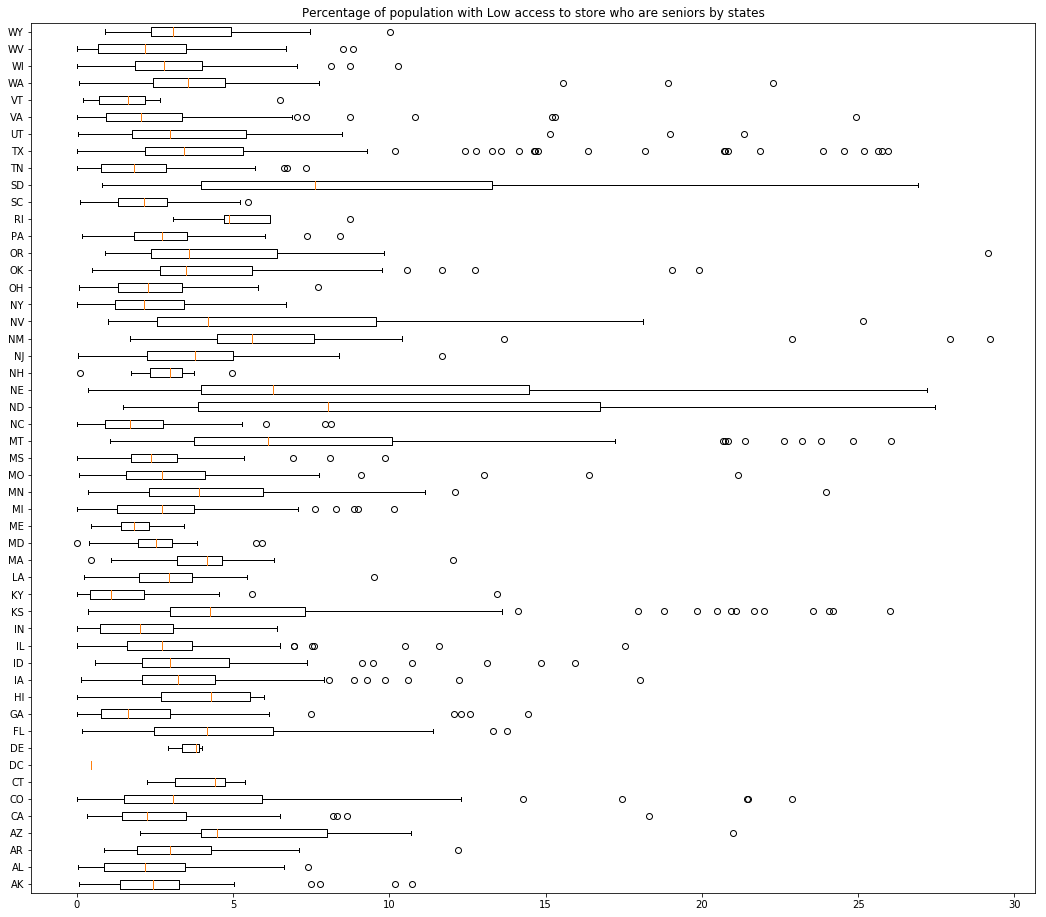

In [9]:
Boxplot_by_state(df_food, col='Low_Access_Overall', by='State', vert=0)
plt.title('Percentage of popoualtion with Low access to store by states')
plt.legend()
plt.show()


Boxplot_by_state(df_food, col='Low_Access_Adult', by='State', vert=0)
plt.title('Percentage of population with Low access to store who are adults by states')
plt.legend()
plt.show()


Boxplot_by_state(df_food, col='Low_Access_Senior', by='State', vert=0)
plt.title('Percentage of population with Low access to store who are seniors by states')
plt.legend()
plt.show()

In [10]:
#'FFRPTH09' is the number of fast food restaurant per 1000 pop and 'FSRPTH09' is the number of full service restaurant per 1000 pop


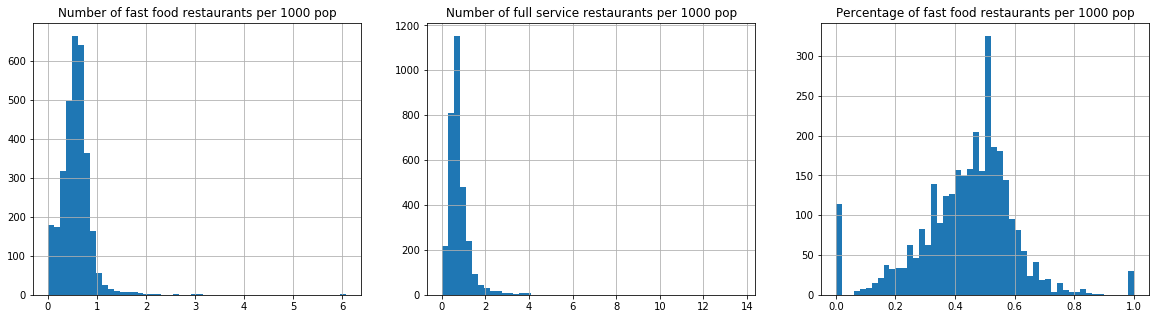

In [11]:
plt.figure(figsize=(20, 5))   
plt.subplot(1,3,1)
plt.title('Number of fast food restaurants per 1000 pop')
df_food['Fast_food'].hist(bins=50)
plt.legend()


plt.subplot(1,3,2)
plt.title('Number of full service restaurants per 1000 pop')
df_food['Full_service'].hist(bins=50)
plt.legend()


plt.subplot(1,3,3)
plt.title('Percentage of fast food restaurants per 1000 pop')
df_food['Percentage_fast_food'].hist(bins=50)
plt.legend()
plt.show()

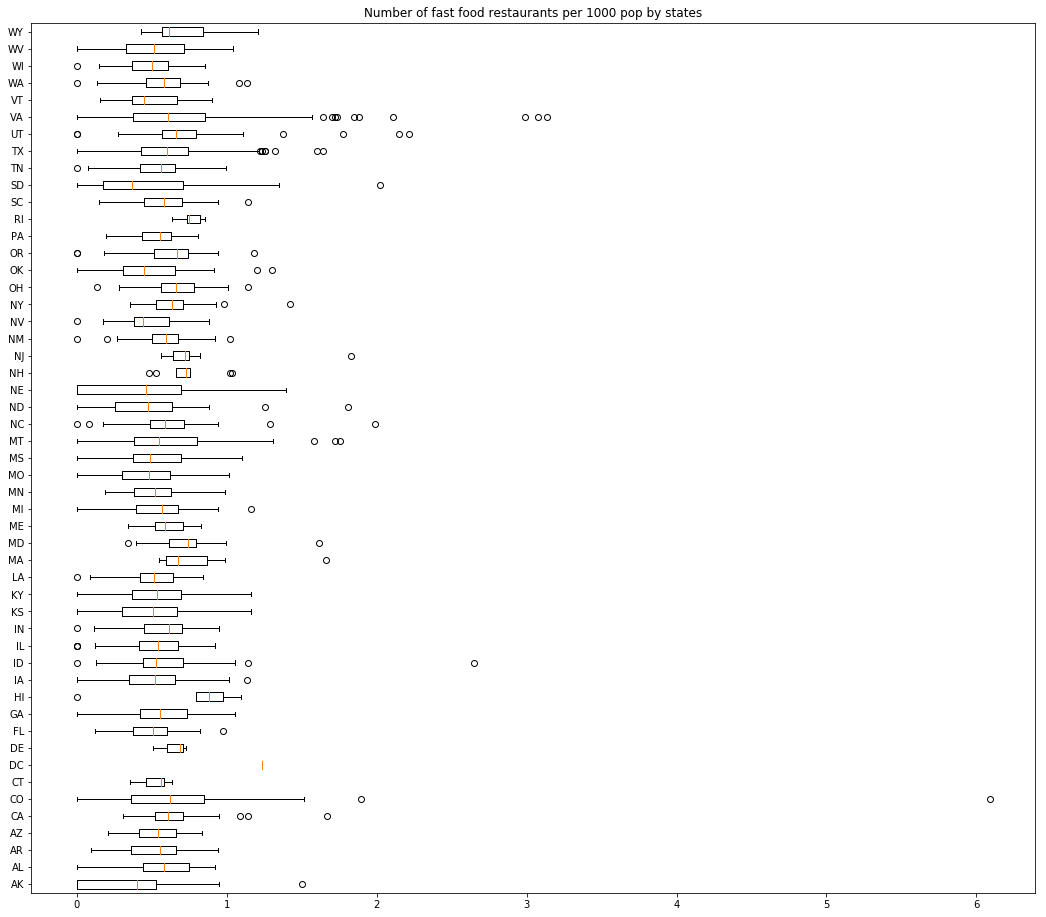

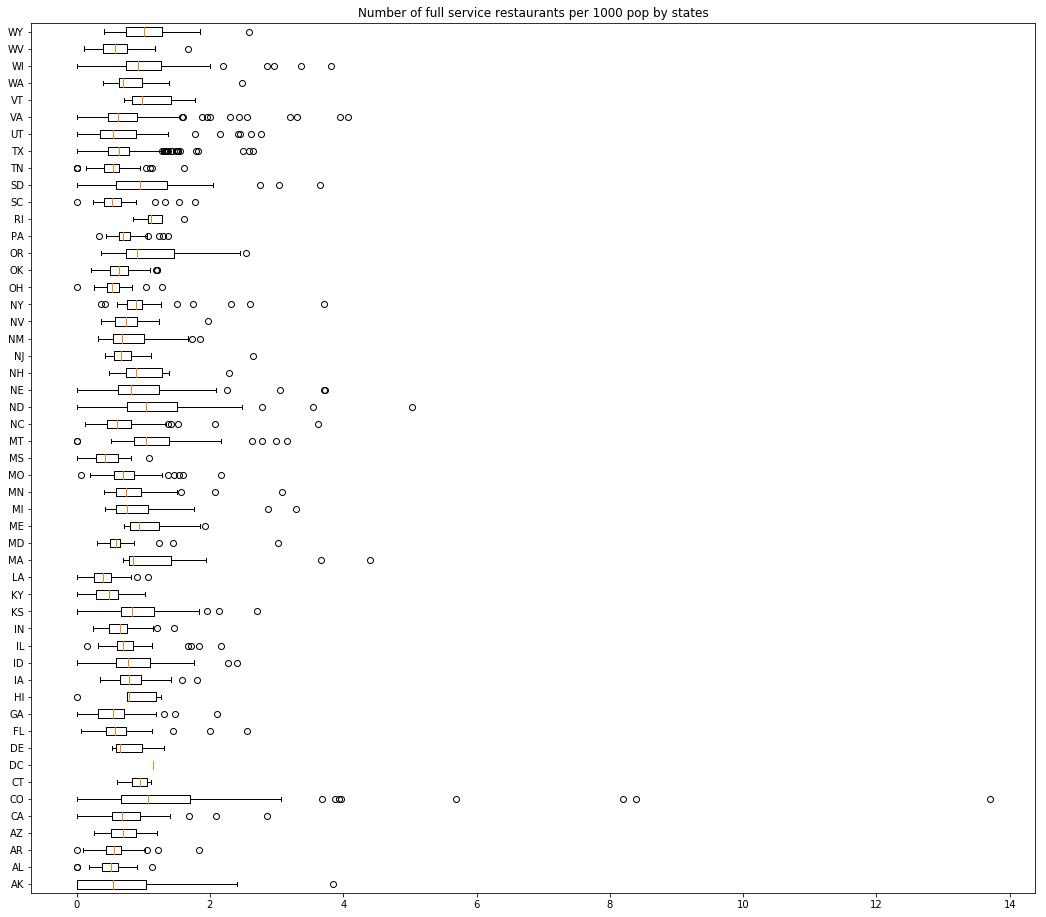

C:\anaconda\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


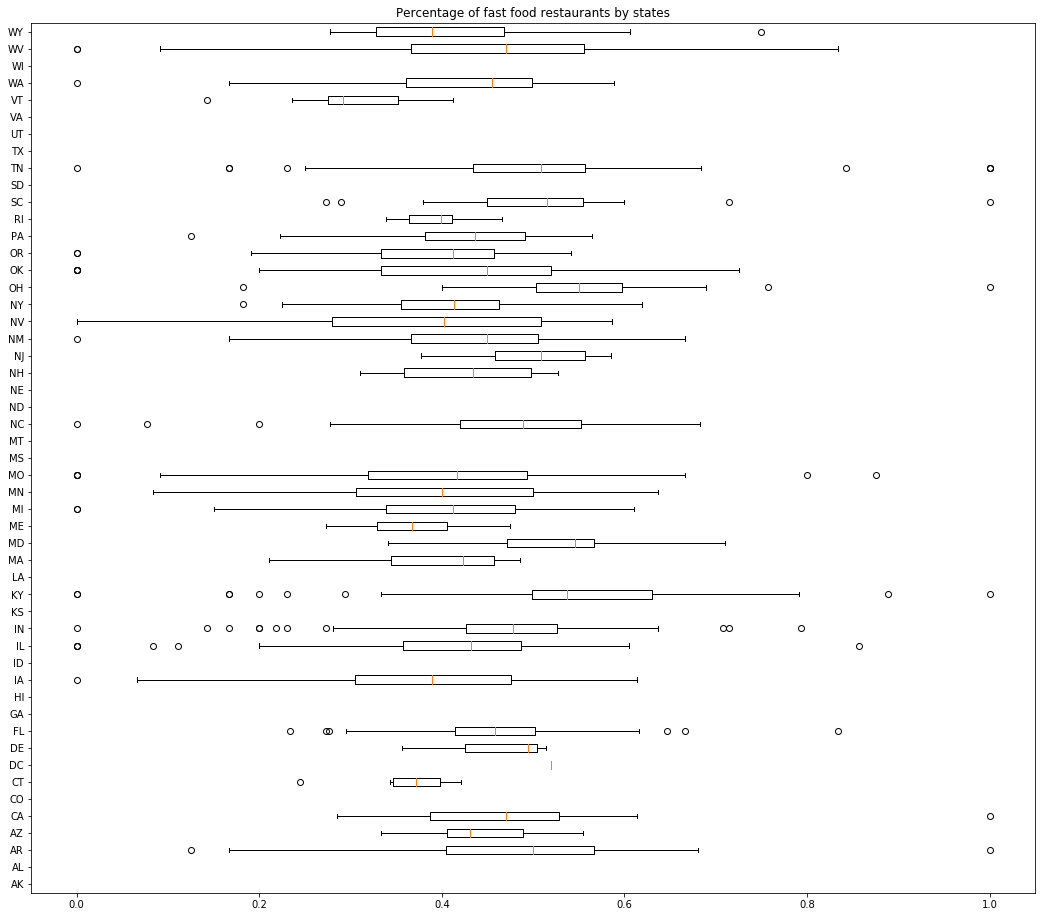

In [12]:
Boxplot_by_state(df_food, col='Fast_food', by='State', vert=0)
plt.title('Number of fast food restaurants per 1000 pop by states')
plt.legend()
plt.show()


Boxplot_by_state(df_food, col='Full_service', by='State', vert=0)
plt.title('Number of full service restaurants per 1000 pop by states')
plt.legend()
plt.show()


Boxplot_by_state(df_food, col='Percentage_fast_food', by='State', vert=0)
plt.title('Percentage of fast food restaurants by states')
plt.legend()
plt.show()

In [13]:
df_food.describe()


,Low_Access_Overall,Low_Access_Low_income,Low_Access_Children,Low_Access_Senior,Grocery,Supercenter,Convenience,Specialized,SNAP_store,WIC_store,...,Hawaiian or Pacific Islander,>=65,<18,Poverty_rate,Adult,Low_Access_Adult,Percentage_fast_food,grocery_super,percentage_grocery_super,assist_store
count,3118.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,...,3143.000000,3143.000000,3143.000000,3139.000000,3143.000000,3118.000000,3109.000000,3143.000000,3127.000000,3143.000000
mean,22.946432,8.374953,5.505321,3.915474,0.268142,0.015581,0.600116,0.056792,0.880064,0.255593,...,0.080453,15.882540,23.419345,16.260975,60.698115,17.583273,0.439913,0.283723,0.296349,1.135657
std,19.134196,8.214988,4.880426,4.215192,0.227271,0.020936,0.309923,0.075752,0.387638,0.257250,...,0.945576,4.190210,3.375268,6.442319,3.740541,14.765393,0.161104,0.223791,0.136402,0.544153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.470599,0.000000,3.400000,47.503747,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.723482,3.442171,2.396962,1.585764,0.149711,0.000000,0.406012,0.000000,0.629603,0.123272,...,0.009995,13.122703,21.429605,11.500000,58.451649,8.366686,0.357143,0.167583,0.215686,0.806351
50%,19.567871,6.150772,4.444210,2.827295,0.206697,0.007298,0.550178,0.043577,0.818400,0.189785,...,0.022916,15.568674,23.327538,15.200000,60.641560,14.854754,0.465587,0.225289,0.276786,1.029611
75%,29.254677,10.324935,6.964972,4.521918,0.305616,0.025621,0.727262,0.083710,1.066786,0.296110,...,0.046468,18.204279,25.102898,19.700000,62.642637,22.299894,0.535714,0.320500,0.342777,1.349092
max,100.000000,72.274456,34.015595,29.208633,3.073770,0.256213,3.121748,1.366120,6.658001,4.618937,...,48.888889,43.384714,41.573938,47.400000,83.253741,89.024390,1.000000,3.073770,1.000000,8.408701


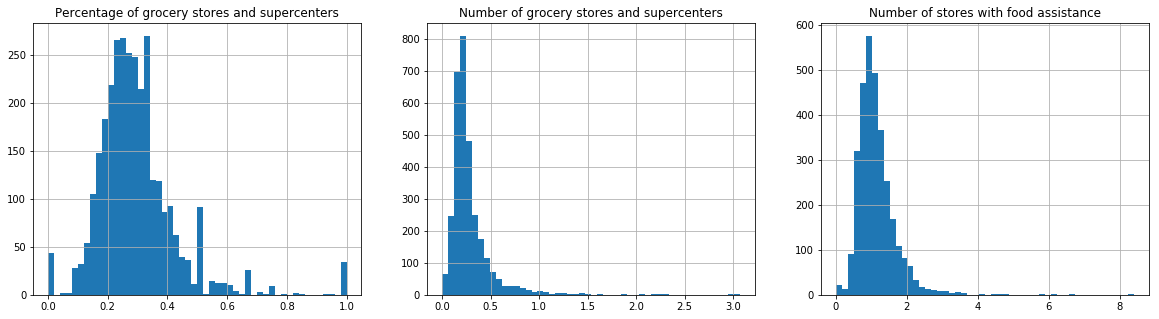

In [14]:
plt.figure(figsize=(20, 5))   

plt.subplot(1,3,1)
plt.title('Percentage of grocery stores and supercenters')
df_food['percentage_grocery_super'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(1,3,2)
plt.title('Number of grocery stores and supercenters')
df_food['grocery_super'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(1,3,3)
plt.title('Number of stores with food assistance')
df_food['assist_store'].hist(bins=50)
plt.legend()
plt.show()

C:\anaconda\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


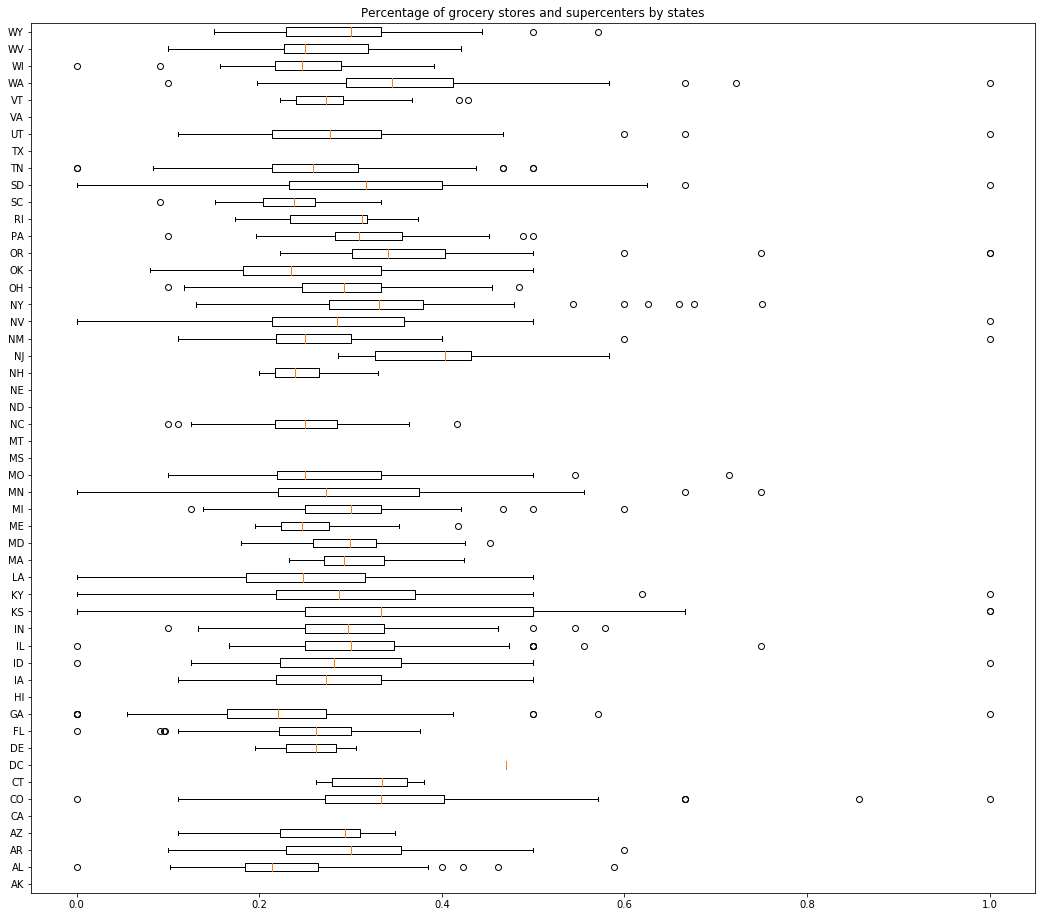

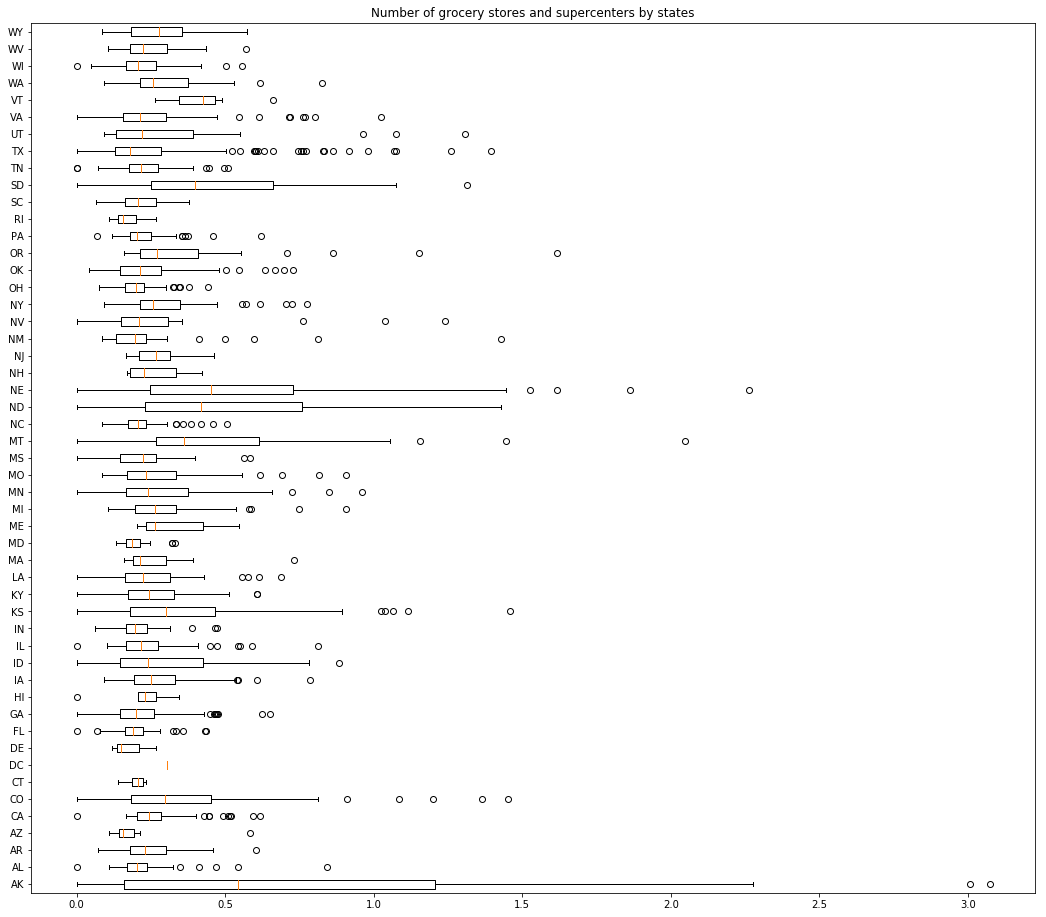

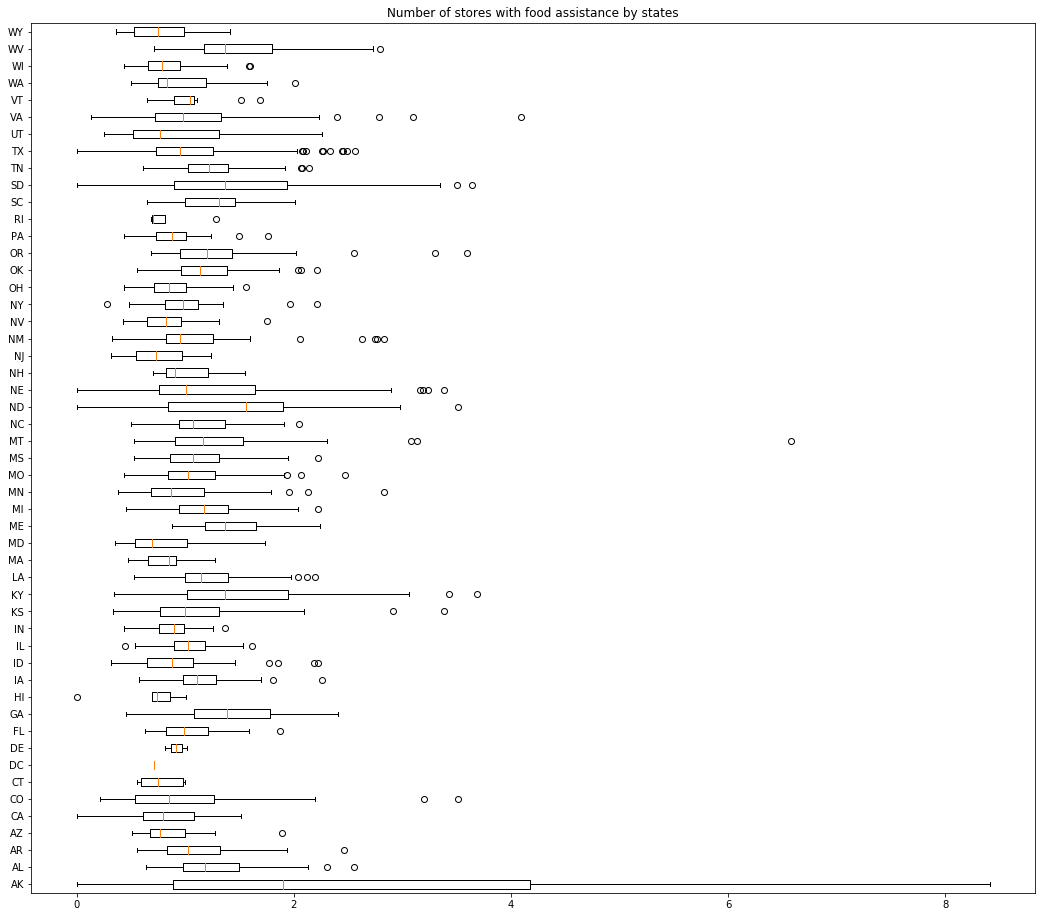

In [15]:
Boxplot_by_state(df_food, col='percentage_grocery_super', by='State', vert=0)
plt.title('Percentage of grocery stores and supercenters by states')
plt.legend()
plt.show()


Boxplot_by_state(df_food, col='grocery_super', by='State', vert=0)
plt.title('Number of grocery stores and supercenters by states')
plt.legend()
plt.show()


Boxplot_by_state(df_food, col='assist_store', by='State', vert=0)
plt.title('Number of stores with food assistance by states')
plt.legend()
plt.show()

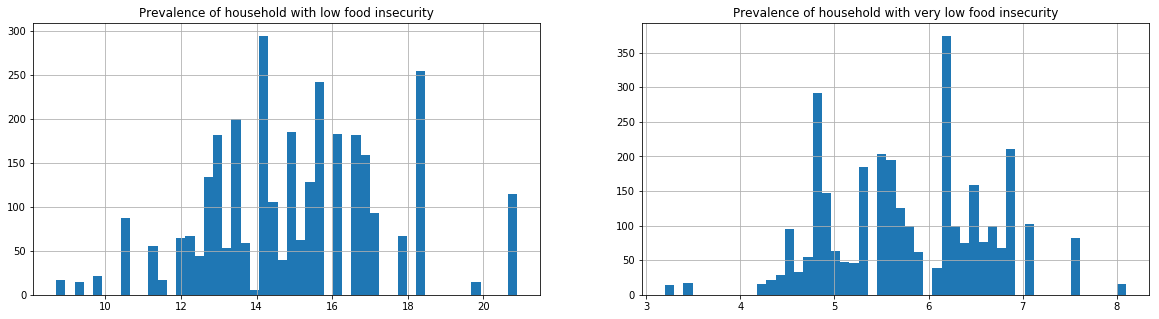

In [16]:
plt.figure(figsize=(20, 5))   

plt.subplot(1,2,1)
plt.title('Prevalence of household with low food insecurity')
df_food['Low_insecurity'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(1,2,2)
plt.title('Prevalence of household with very low food insecurity')
df_food['Very_low_insecurity'].hist(bins=50)
plt.legend()
plt.show()

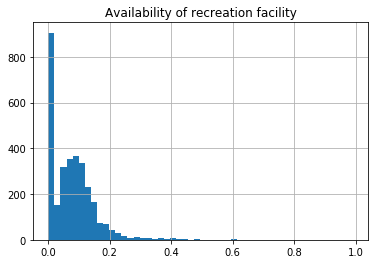

In [17]:
plt.title('Availability of recreation facility')
df_food['Recreation_facility'].hist(bins=50)
plt.legend()
plt.show()

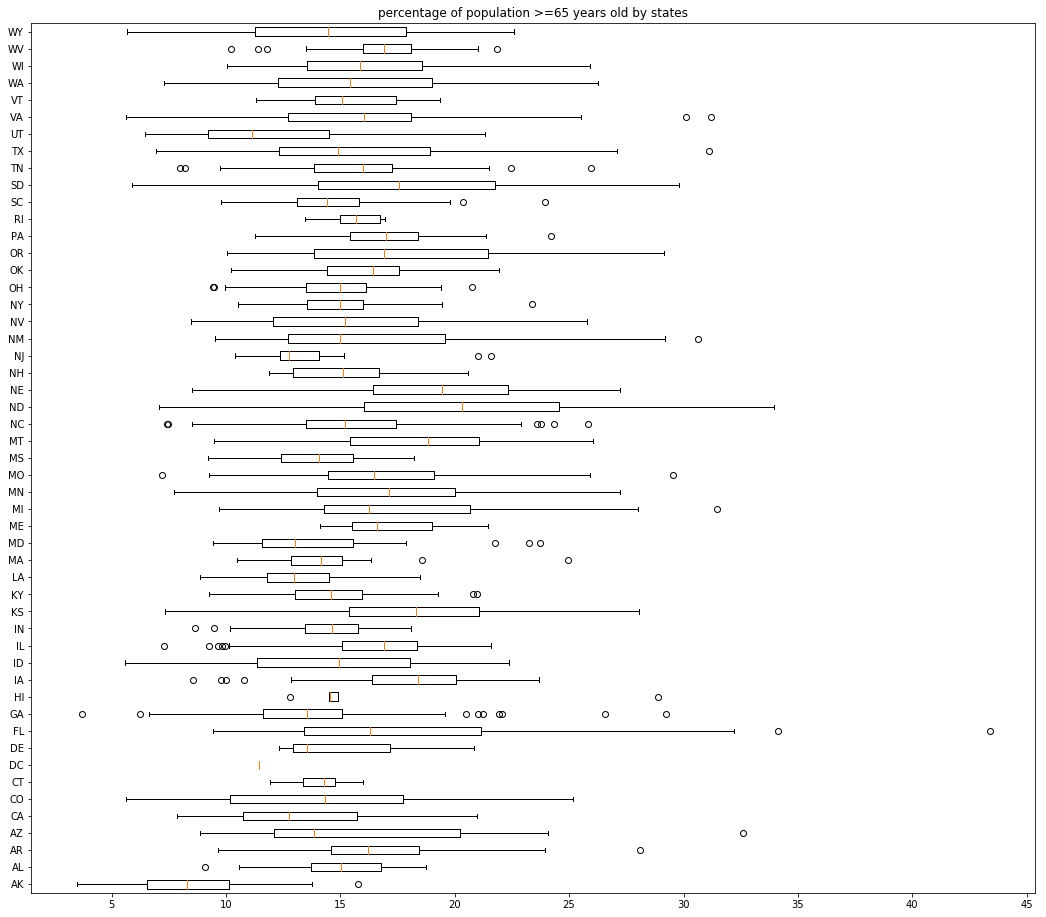

In [18]:
Boxplot_by_state(df_food, col='>=65', by='State', vert=0)
plt.title('percentage of population >=65 years old by states')
plt.legend()
plt.show()

In [19]:
df_cdc.describe()

,2011_db_ad,2012_ob_ad,2012_phy_ad
count,3221.000000,3143.000000,3143.000000
mean,9.633685,30.801718,26.204804
std,2.159800,4.579568,5.167122
min,4.000000,10.700000,9.300000
25%,8.100000,28.250000,22.800000
50%,9.400000,30.900000,26.400000
75%,11.000000,33.600000,29.600000
max,19.400000,46.900000,40.600000


In [20]:
for c in df_cdc.columns:
    print(c, sum(df_cdc.applymap(lambda x: isinstance(x, (int, float)))[c]))

2004_db_ad 0
2005_db_ad 0
2006_db_ad 0
2007_db_ad 0
2008_db_ad 0
2009_db_ad 0
2010_db_ad 0
2011_db_ad 3224
2012_db_ad 0
2013_db_ad 0
2004_ob_ad 0
2005_ob_ad 0
2006_ob_ad 0
2007_ob_ad 0
2008_ob_ad 0
2009_ob_ad 0
2010_ob_ad 0
2011_ob_ad 78
2012_ob_ad 3224
2013_ob_ad 78
2004_phy_ad 0
2005_phy_ad 0
2006_phy_ad 0
2007_phy_ad 0
2008_phy_ad 0
2009_phy_ad 0
2010_phy_ad 0
2011_phy_ad 0
2012_phy_ad 3224
2013_phy_ad 78
2004_db 0
2005_db 0
2006_db 0
2007_db 0
2008_db 0
2009_db 0
2010_db 0
2011_db 0
2012_db 0
2013_db 0
2004_ob 0
2005_ob 0
2006_ob 0
2007_ob 0
2008_ob 0
2009_ob 0
2010_ob 0
2011_ob 78
2012_ob 78
2013_ob 78
2004_phy 0
2005_phy 0
2006_phy 0
2007_phy 0
2008_phy 0
2009_phy 0
2010_phy 0
2011_phy 0
2012_phy 78
2013_phy 78


In [21]:
df_cdc=df_cdc.replace('No Data', np.nan)

In [22]:
df_cdc=df_cdc.astype(float)

In [23]:
df_cdc.describe()

,2004_db_ad,2005_db_ad,2006_db_ad,2007_db_ad,2008_db_ad,2009_db_ad,2010_db_ad,2011_db_ad,2012_db_ad,2013_db_ad,...,2004_phy,2005_phy,2006_phy,2007_phy,2008_phy,2009_phy,2010_phy,2011_phy,2012_phy,2013_phy
count,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3221.000000,3221.000000,3221.000000,3221.000000,3220.000000,...,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3143.000000,3143.000000,3143.000000,3143.000000,3142.000000
mean,7.672041,8.002081,8.493818,8.793041,9.000497,9.218379,9.432599,9.633685,9.719062,9.746366,...,25.925279,25.904903,26.256224,26.702770,27.058835,27.851670,27.843589,26.992809,27.354534,25.951369
std,1.630177,1.757813,1.947902,2.010413,2.014380,2.039624,2.097461,2.159800,2.215307,2.322092,...,5.237766,5.199276,5.388627,5.094992,5.052302,5.150904,5.289976,5.321526,5.415192,5.202015
min,4.000000,3.900000,3.800000,3.700000,3.700000,3.800000,3.500000,4.000000,4.000000,3.800000,...,9.200000,9.600000,8.900000,9.800000,9.700000,10.100000,10.400000,9.200000,9.100000,8.100000
25%,6.500000,6.800000,7.000000,7.300000,7.500000,7.700000,7.900000,8.100000,8.200000,8.100000,...,22.600000,22.800000,22.900000,23.700000,24.100000,24.550000,24.500000,23.500000,23.900000,22.600000
50%,7.500000,7.800000,8.200000,8.500000,8.700000,9.000000,9.200000,9.400000,9.400000,9.400000,...,25.800000,25.700000,26.100000,26.800000,27.300000,28.200000,28.100000,27.300000,27.600000,25.800000
75%,8.500000,9.000000,9.700000,10.100000,10.400000,10.500000,10.700000,11.000000,11.100000,11.200000,...,29.100000,28.900000,29.500000,29.900000,30.100000,31.300000,31.400000,30.700000,30.900000,29.400000
max,16.000000,16.400000,16.300000,16.300000,16.100000,17.800000,19.500000,19.400000,21.100000,20.800000,...,42.400000,43.900000,44.700000,44.400000,44.800000,43.900000,44.900000,42.700000,41.700000,41.400000


In [26]:
df_whole=pd.concat([df_food, df_cdc],axis=1)


Multivariate analysis

In [27]:
#import packages
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [28]:
df_whole.columns

Index(['State', 'County', 'Low_Access_Overall', 'Low_Access_Low_income',
       'Low_Access_Children', 'Low_Access_Senior', 'Grocery', 'Supercenter',
       'Convenience', 'Specialized', 'SNAP_store', 'WIC_store', 'Fast_food',
       'Full_service', 'Assistance', 'Low_insecurity', 'Very_low_insecurity',
       'Adult_db', 'Adult_ob', 'Recreation_facility', 'White', 'Black',
       'Hispanic', 'Asian', 'American Indian or Alaska Native',
       'Hawaiian or Pacific Islander', '>=65', '<18', 'Poverty_rate', 'Adult',
       'Low_Access_Adult', 'Percentage_fast_food', 'grocery_super',
       'percentage_grocery_super', 'assist_store', '2004_db_ad', '2005_db_ad',
       '2006_db_ad', '2007_db_ad', '2008_db_ad', '2009_db_ad', '2010_db_ad',
       '2011_db_ad', '2012_db_ad', '2013_db_ad', '2004_ob_ad', '2005_ob_ad',
       '2006_ob_ad', '2007_ob_ad', '2008_ob_ad', '2009_ob_ad', '2010_ob_ad',
       '2011_ob_ad', '2012_ob_ad', '2013_ob_ad', '2004_phy_ad', '2005_phy_ad',
       '2006_phy_ad', '

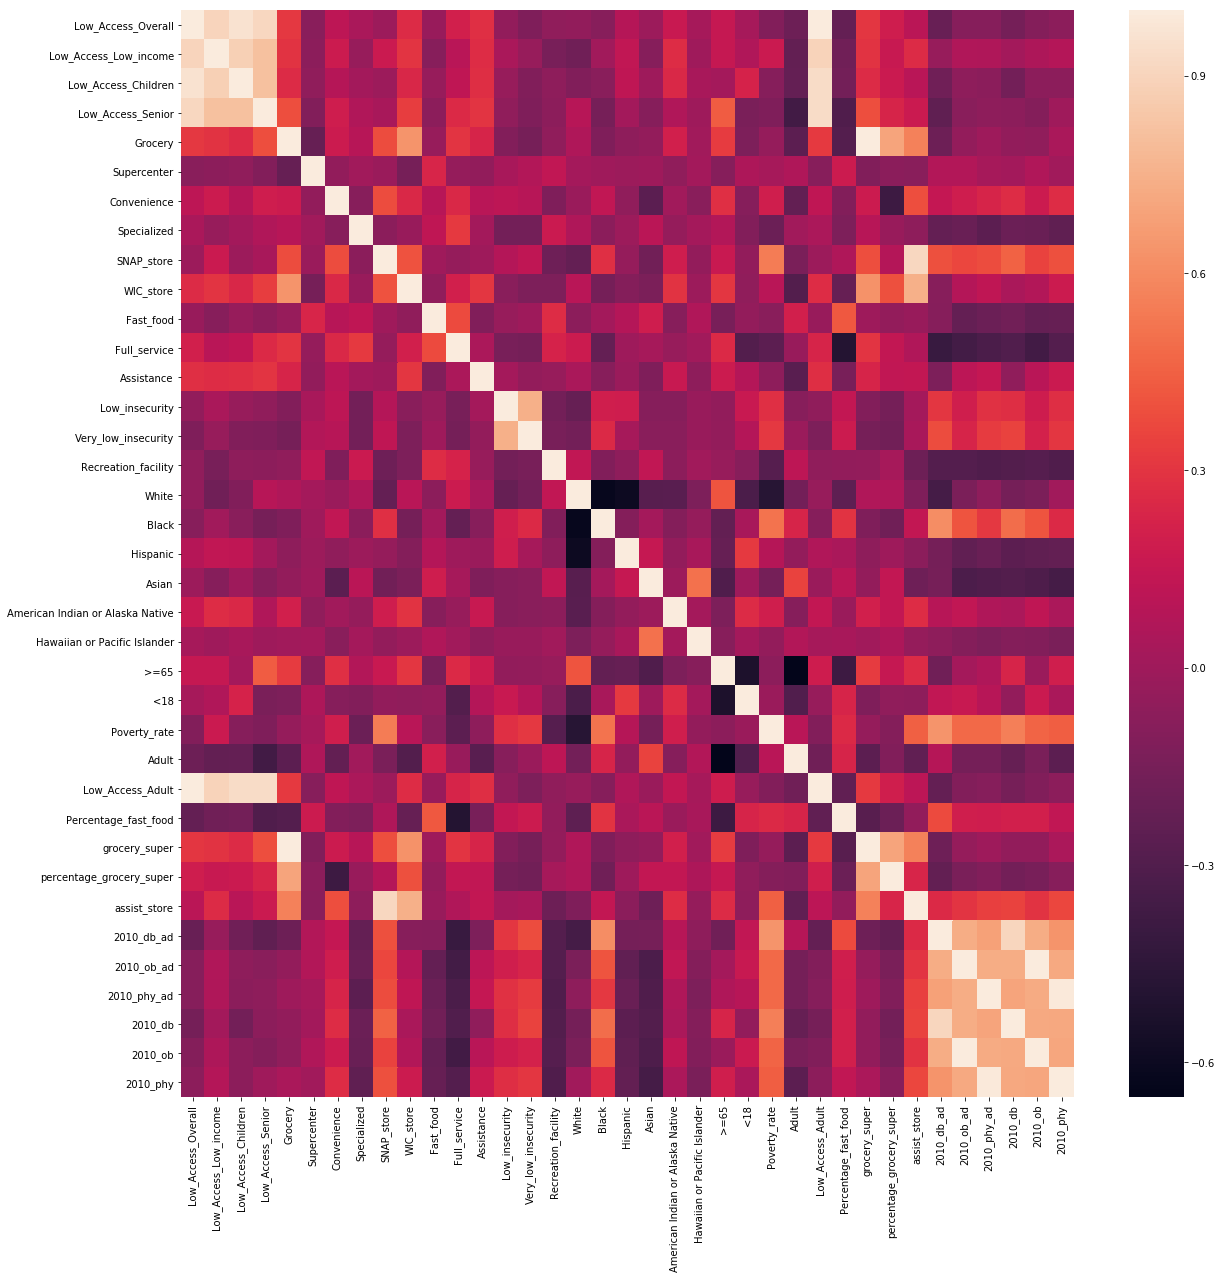

In [33]:
# Construct the covariance matrix
import numpy as np
import seaborn as sns

plt.figure(figsize=(20, 20))  
var_to_test=list()
for c in df_whole.columns:
    if ('db' in c) or ('ob' in c) or ('phy' in c):
        if '2010' in c:
            var_to_test.append(c)
    elif c not in ['State', 'County']:
        var_to_test.append(c)
df_corr=df_whole[var_to_test]
corr=df_corr.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()


In [48]:
for idx in corr.index:
    for col in corr.columns:
        if corr.loc[idx,col]>0.4 and corr.loc[idx,col]<1:
            print (idx,col,corr.loc[idx,col])

#list of chosen variables among which there is noticable positive correlation
var_list=['SNAP_store', 'Poverty_rate', 'Black','2010_db_ad', '2010_ob_ad', '2010_phy_ad','White', '>=65']

Low_Access_Overall Low_Access_Low_income 0.899763229289
Low_Access_Overall Low_Access_Children 0.960190869191
Low_Access_Overall Low_Access_Senior 0.91321615979
Low_Access_Overall Low_Access_Adult 0.99614246027
Low_Access_Low_income Low_Access_Overall 0.899763229289
Low_Access_Low_income Low_Access_Children 0.882922632674
Low_Access_Low_income Low_Access_Senior 0.816201575916
Low_Access_Low_income Low_Access_Adult 0.890330722238
Low_Access_Children Low_Access_Overall 0.960190869191
Low_Access_Children Low_Access_Low_income 0.882922632674
Low_Access_Children Low_Access_Senior 0.814999851372
Low_Access_Children Low_Access_Adult 0.931974175086
Low_Access_Senior Low_Access_Overall 0.91321615979
Low_Access_Senior Low_Access_Low_income 0.816201575916
Low_Access_Senior Low_Access_Children 0.814999851372
Low_Access_Senior >=65 0.437512641261
Low_Access_Senior Low_Access_Adult 0.929126137786
Grocery WIC_store 0.635028835736
Grocery grocery_super 0.994974835722
Grocery percentage_grocery_super 0

In [49]:
for idx in corr.index:
    for col in corr.columns:
        if corr.loc[idx,col]<-0.3:
            print (idx,col,corr.loc[idx,col])

var_list.extend(['Full_service', 'Recreation_facility', 'Percentage_fast_food'])
'''
Full_service 2010_db_ad -0.405008648876
Full_service 2010_ob_ad -0.36013373499
Full_service 2010_phy_ad -0.327688517557
Recreation_facility 2010_phy_ad -0.307227917314
White <18 -0.329512005427
White Poverty_rate -0.479147398447
White 2010_db_ad -0.351093216942
>=65 Percentage_fast_food -0.38294070154
Poverty_rate White -0.479147398447
Percentage_fast_food Full_service -0.494537711537
2010_db_ad White -0.351093216942
2010_ob_ad Full_service -0.36013373499
2010_ob_ad Asian -0.318234478903
2010_phy_ad Full_service -0.327688517557
2010_phy_ad Recreation_facility -0.307227917314'''

Low_Access_Senior Adult -0.36414450962
Low_Access_Senior Percentage_fast_food -0.307702894578
Convenience percentage_grocery_super -0.388201604237
Full_service Percentage_fast_food -0.494537711537
Full_service 2010_db_ad -0.405008648876
Full_service 2010_ob_ad -0.36013373499
Full_service 2010_phy_ad -0.327688517557
Full_service 2010_db -0.300990274254
Full_service 2010_ob -0.364646881126
Recreation_facility 2010_phy_ad -0.307227917314
Recreation_facility 2010_phy -0.306556373437
White Black -0.625744814125
White Hispanic -0.596028533047
White <18 -0.329512005427
White Poverty_rate -0.479147398447
White 2010_db_ad -0.351093216942
Black White -0.625744814125
Hispanic White -0.596028533047
Asian >=65 -0.306214231401
Asian 2010_ob_ad -0.318234478903
Asian 2010_phy_ad -0.309919286847
Asian 2010_ob -0.31675485819
Asian 2010_phy -0.351651059019
>=65 Asian -0.306214231401
>=65 <18 -0.525877097289
>=65 Adult -0.652975211121
>=65 Percentage_fast_food -0.38294070154
<18 White -0.329512005427
<18 

'\nFull_service 2010_db_ad -0.405008648876\nFull_service 2010_ob_ad -0.36013373499\nFull_service 2010_phy_ad -0.327688517557\nRecreation_facility 2010_phy_ad -0.307227917314\nWhite <18 -0.329512005427\nWhite Poverty_rate -0.479147398447\nWhite 2010_db_ad -0.351093216942\n>=65 Percentage_fast_food -0.38294070154\nPoverty_rate White -0.479147398447\nPercentage_fast_food Full_service -0.494537711537\n2010_db_ad White -0.351093216942\n2010_ob_ad Full_service -0.36013373499\n2010_ob_ad Asian -0.318234478903\n2010_phy_ad Full_service -0.327688517557\n2010_phy_ad Recreation_facility -0.307227917314'

Index(['SNAP_store', 'Poverty_rate', 'Black', '2010_db_ad', '2010_ob_ad',
       '2010_phy_ad', 'White', '>=65', 'Full_service', 'Recreation_facility',
       'Percentage_fast_food'],
      dtype='object')


C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


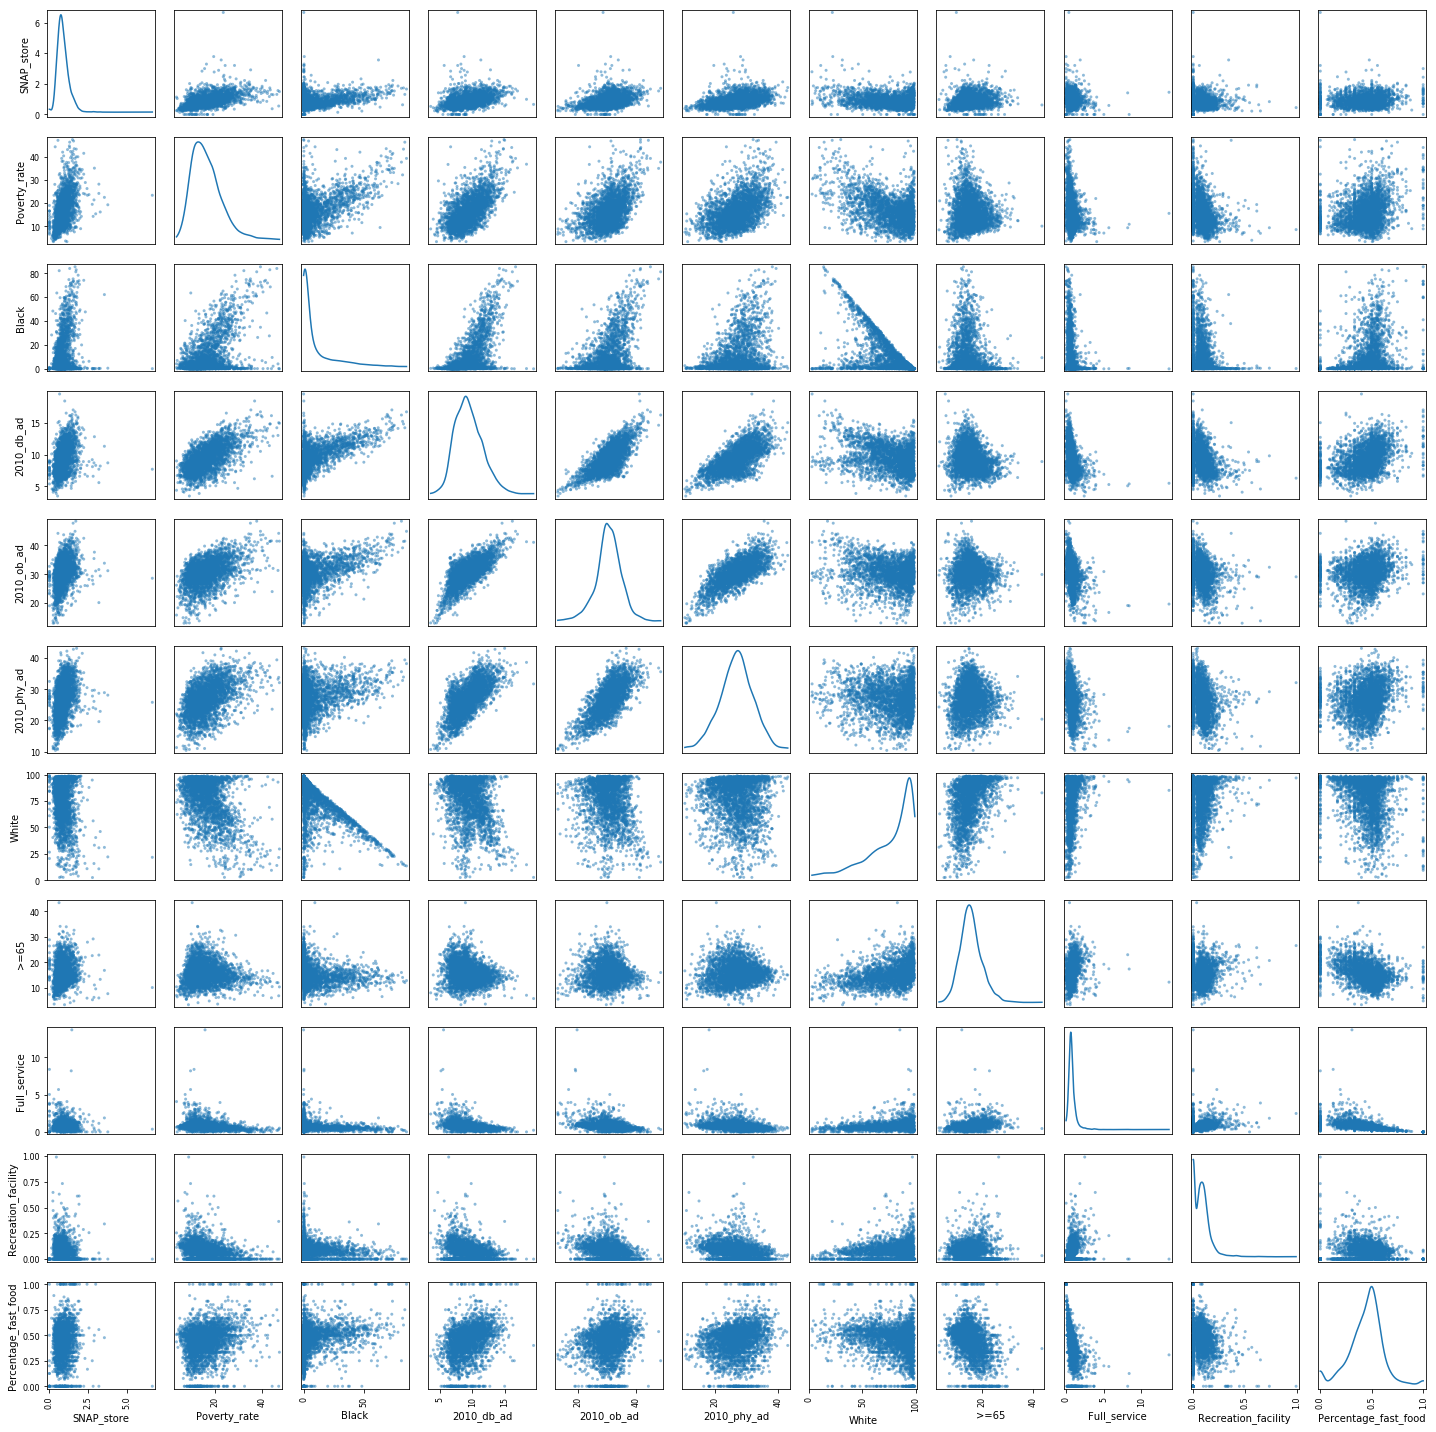

In [50]:
df_matrix=df_whole[var_list]
print (df_matrix.columns)
pd.tools.plotting.scatter_matrix(df_matrix, figsize=(20, 20), diagonal="kde")
plt.tight_layout()
plt.show()

There are several interesting phenomenon in the above figure: 
    
i. There is strong correlation among prevalence of diabetes, obesity and physical inactivity
ii. There is a negative correaltion between the recreation 
ii. there is a high positive correlation between poverty rate and prevalene of diabetes, obesity and physical inactivity
iii. areas with high poverty rate also tend to be areas with higher percentage of blacks but lower percentage of white people
iv. There is a moderate positive relationship between the percentage of fast food restaurants and prevalence of diabetes, obesity and physical activity
v. Population with higher percentage of senior people tend to reside in area with smaller percentage of fast food restaurant

This suggests that prevalence of diabetes and obesity can differ by areas with different composition of age, race, food choice, level of poverty and level of physical activity and recreation facilities. 

Among these factors, race and availability of SNAP store both have a strong correlation with poverty rate, therefore, in the following analysis, I drop these two variables and only keep the poverty rate. 

Variables that are to be included in the following analysis are:
'Poverty_rate', '>=65', 'Recreation_facility', 'Percentage_fast_food','2010_phy_ad', '2010_db_ad', '2010_ob_ad'

To make the analysis simple and trackable, I stratefy the population based on 'Poverty_rate'
Both variables are continuous numeric variables, so in order to stratefy the population, I broke each into 5 groups based on percentage


Examine interaction using groupby

In [83]:
#df_whole['senior_level']=pd.qcut(df_whole['>=65'],4,labels=["low", "low-median", "median-high","high"])
df_whole['poverty_level']=pd.qcut(df_whole['Poverty_rate'],5,labels=["very low", "low", "median","high","very high"])

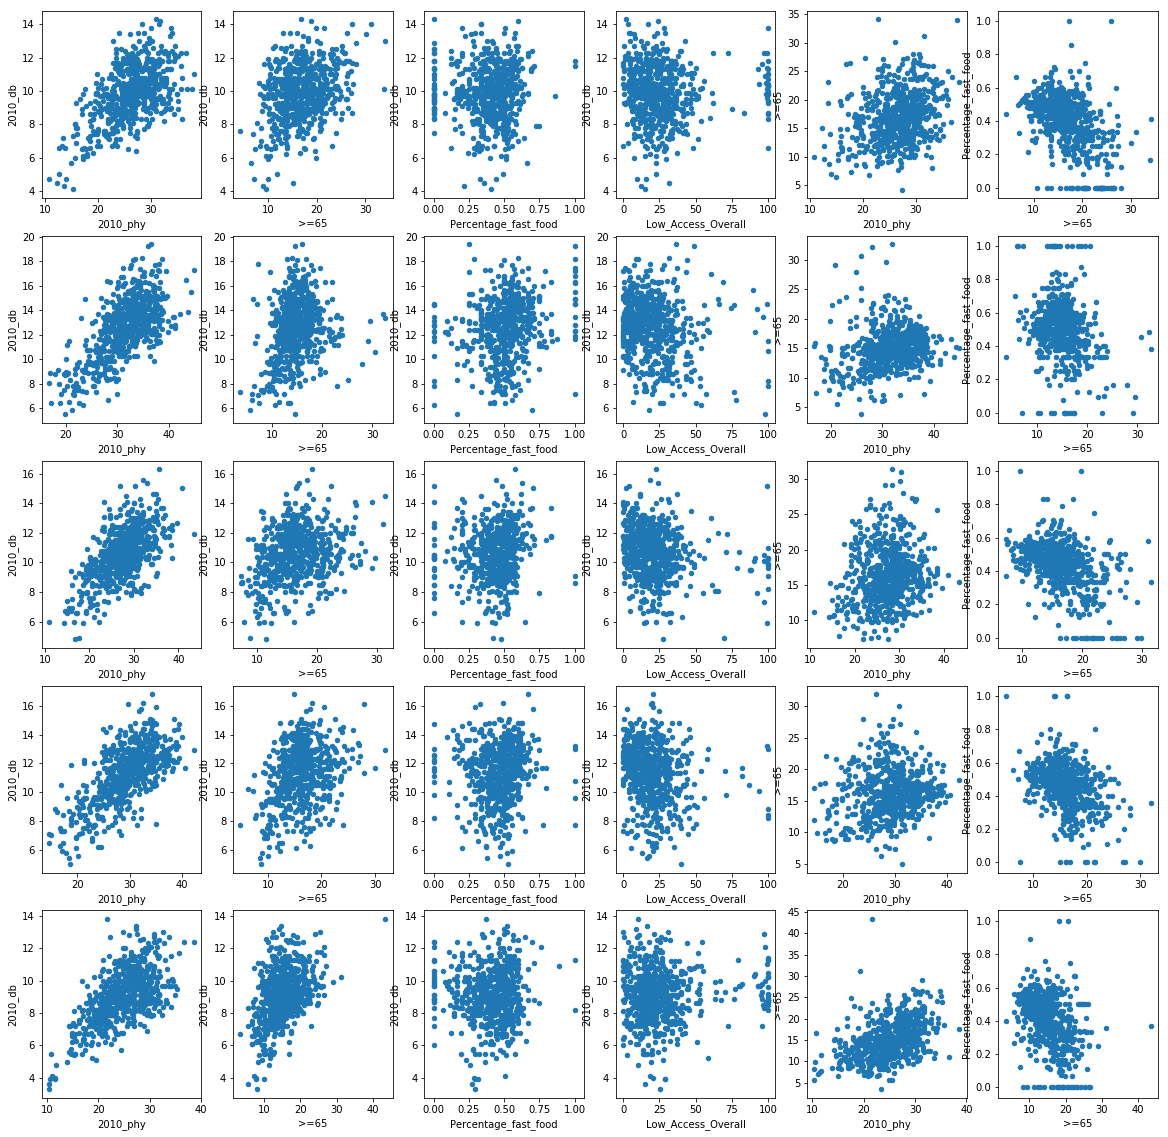

In [89]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 20))

for m,poverty in enumerate(set(df_whole['poverty_level'].dropna())):
    df_subset=df_whole[df_whole['poverty_level']==poverty]
    #print (df_subset)
    for n,x in enumerate(['2010_phy', '>=65', 'Percentage_fast_food','Low_Access_Overall']):
        df_subset.plot(x=x,y='2010_db',kind='scatter',ax=axes[m, n])
    df_subset.plot(x='2010_phy',y='>=65',kind='scatter',ax=axes[m, 4])
    df_subset.plot(x='>=65',y='Percentage_fast_food',kind='scatter',ax=axes[m, 5])
    #plt.xlabel='prevalence of '
plt.show()

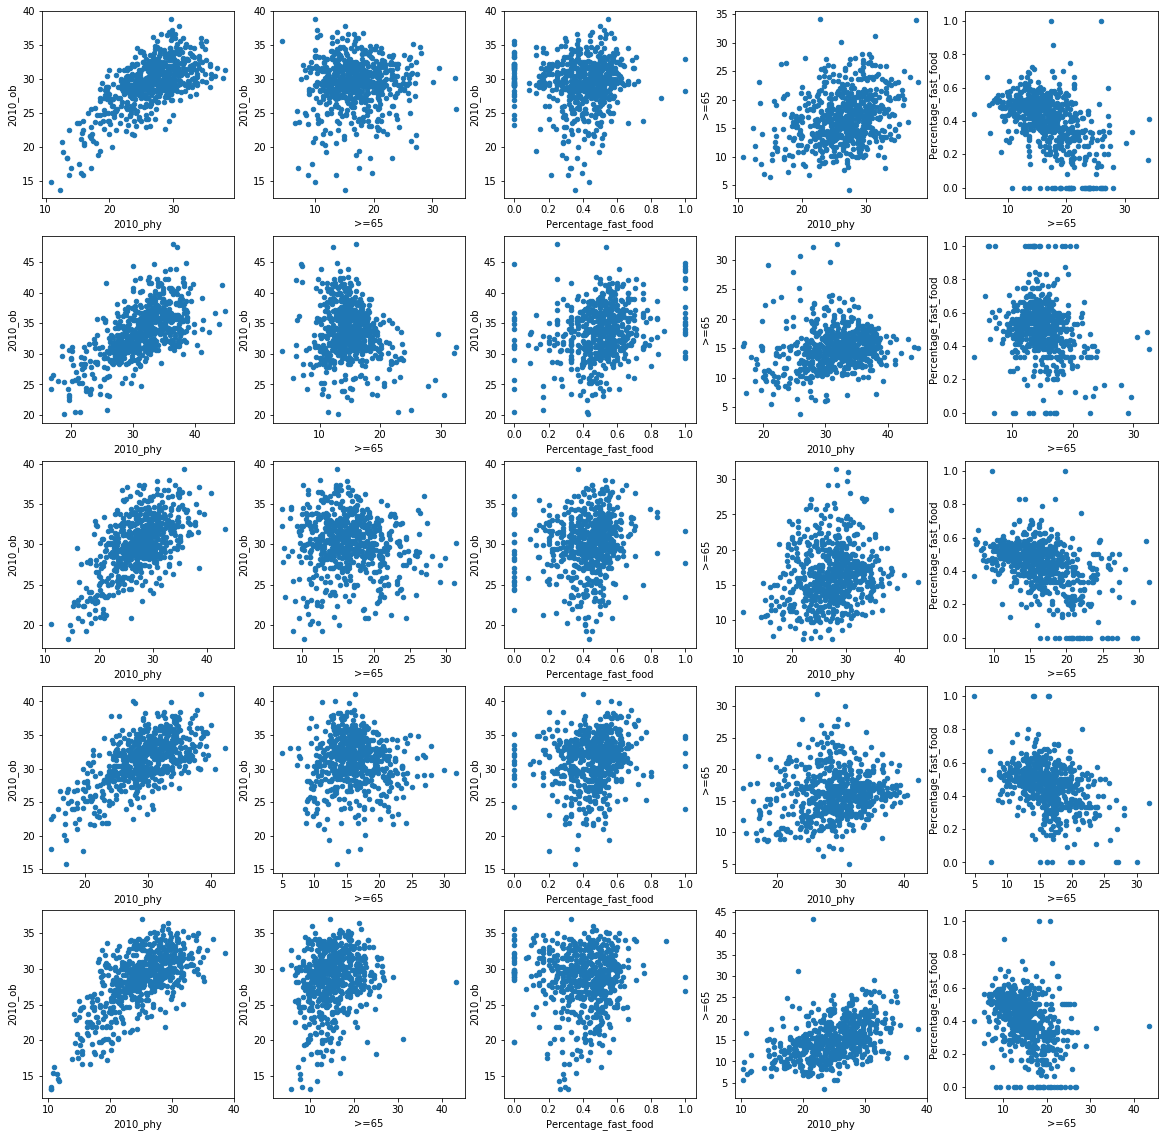

In [87]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

for m,poverty in enumerate(set(df_whole['poverty_level'].dropna())):
    df_subset=df_whole[df_whole['poverty_level']==poverty]
    #print (df_subset)
    for n,x in enumerate(['2010_phy', '>=65', 'Percentage_fast_food']):
        df_subset.plot(x=x,y='2010_ob',kind='scatter',ax=axes[m, n])
    df_subset.plot(x='2010_phy',y='>=65',kind='scatter',ax=axes[m, 3])
    df_subset.plot(x='>=65',y='Percentage_fast_food',kind='scatter',ax=axes[m, 4])
    #plt.xlabel='prevalence of '
plt.show()

In [ ]:
So far it seems that physical inactivity consistentlyl highly correlates with the prevalence of diabetes and obesity, where age correlates with diabetes more than it does with obesity. 
The percentage of fast food resturant available does not show considerable correlation with either 